In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000

In [3]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

### Import Data

In [21]:
# Import
df = pd.read_excel('In/1-2017.xlsx')
print("{:,} order lines".format(len(df)))
df.head()

144,339 order lines


,DATE FORMAT,ORDER_NUMBER,SKU,BOX
0,2017-01-01,835220,290731,1.0
1,2017-01-01,835220,373272,1.0
2,2017-01-01,835214,362101,1.0
3,2017-01-01,835215,215515,1.0
4,2017-01-01,835215,287995,1.0


### Processing

In [3]:
# BOX/SKU
df_par = pd.DataFrame(df.groupby(['SKU'])['BOX'].sum())
df_par.columns = ['BOX']

# Sort Values
df_par.sort_values(['BOX'], ascending = False, inplace = True)
df_par.reset_index(inplace = True)

# Cumulative Sum 
df_par['CumSum'] = df_par['BOX'].cumsum()

# % CumSum
df_par['%CumSum'] = (100 * df_par['CumSum']/df_par['BOX'].sum())

# % SKU
df_par['%SKU'] = (100 * (df_par.index + 1).astype(float)/(df_par.index.max() + 1))

# 80% Volume
df_par80 = df_par[df_par['%CumSum'] > 80].copy()
perc_sku80 = df_par[df_par['%CumSum'] > 80]['%SKU'].min()
perc_sum80 = df_par[df_par['%CumSum'] > 80]['%CumSum'].min()

# 20% SKU
df_sku20 = df_par[df_par['%SKU'] > 20].copy()
perc_sku20 = df_sku20['%SKU'].min()
perc_sum20 = df_sku20['%CumSum'].min()

# 5% SKU
df_sku5 = df_par[df_par['%SKU'] > 5].copy()
perc_sku5 = df_par[df_par['%SKU'] > 5]['%SKU'].min()
perc_sum5 = df_par[df_par['%SKU'] > 5]['%CumSum'].min()

print("Pareto Analysis for {:,} unique SKU".format(len(df_par)))
df_par.head()

Pareto Analysis for 4,864 unique SKU


,SKU,BOX,CumSum,%CumSum,%SKU
0,359803,4810.0,4810.0,2.911658,0.020559
1,290478,4132.0,8942.0,5.412898,0.041118
2,366639,4104.0,13046.0,7.897190,0.061678
3,359958,4062.0,17108.0,10.356058,0.082237
4,253500,3879.0,20987.0,12.704149,0.102796


### Pareto Chart Plot

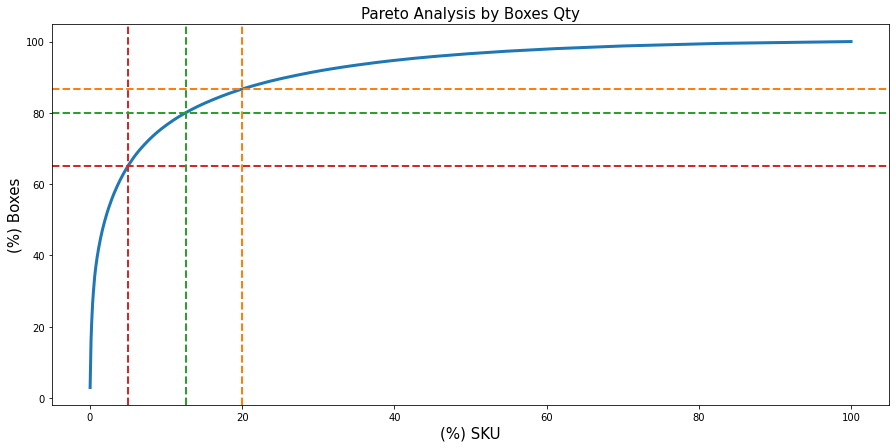

In [20]:
ax = df_par.plot(x='%SKU', y='%CumSum', figsize = (15,7), color = 'tab:blue', legend = False, linewidth=3)
plt.xlabel('(%) SKU',fontsize=15)
plt.ylabel('(%) Boxes',fontsize=15)
plt.title('Pareto Analysis by Boxes Qty', fontsize = 15)
# 5% SKU
ax.axhline(perc_sum5 , color="tab:red", linestyle="--", linewidth = 2.0)
ax.axvline(perc_sku5, color="tab:red", linestyle="--", linewidth = 2.0)
# 80% Volume
ax.axhline(perc_sum80 , color="tab:green", linestyle="--", linewidth = 2.0)
ax.axvline(perc_sku80, color="tab:green", linestyle="--", linewidth = 2.0)
# 20% SKU
ax.axhline(perc_sum20 , color="tab:orange", linestyle="--", linewidth = 2.0)
ax.axvline(perc_sku20, color="tab:orange", linestyle="--", linewidth = 2.0)
plt.show()